## Visualizing Earnings Based on College Majors

In this project, we will be exploring a dataset on the job outcomes of students who graduated from college between 2010 and 2012.  The data was released by the American Community Survey through the U.S. Census Bureau.  

The dataset represents information, such as gender diversity, employment rates, and salaries, grouped by college majors.

Let's start by importing the libraries we will use and exploring the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")
recent_grads.head(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0


In [3]:
recent_grads.tail(3)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [4]:
print(recent_grads.describe())
print("\n")
print(recent_grads.info())

             Rank   Major_code          Total            Men          Women  \
count  173.000000   173.000000     172.000000     172.000000     172.000000   
mean    87.000000  3879.815029   39370.081395   16723.406977   22646.674419   
std     50.084928  1687.753140   63483.491009   28122.433474   41057.330740   
min      1.000000  1100.000000     124.000000     119.000000       0.000000   
25%     44.000000  2403.000000    4549.750000    2177.500000    1778.250000   
50%     87.000000  3608.000000   15104.000000    5434.000000    8386.500000   
75%    130.000000  5503.000000   38909.750000   14631.000000   22553.750000   
max    173.000000  6403.000000  393735.000000  173809.000000  307087.000000   

       ShareWomen  Sample_size       Employed      Full_time      Part_time  \
count  172.000000   173.000000     173.000000     173.000000     173.000000   
mean     0.522223   356.080925   31192.763006   26029.306358    8832.398844   
std      0.231205   618.361022   50675.002241   428

It looks like there is only one row with missing data.  Removing this row shouldn't distort our results too much and will prevent errors during our later analysis.

In [5]:
raw_data_count = len(recent_grads)
recent_grads = recent_grads.dropna()
cleaned_data_count = len(recent_grads)
print('Rows removed: ' + str(raw_data_count - cleaned_data_count))

Rows removed: 1


## Data Exploration: Variable Relationships

Now let's start exploring the data.  We will begin by generating scatterplots to compare the relationships between different variables.  The questions we will be exploring include:

1. Do students in popular majors make more money?
2. Do students that majored in gender-majority subjects make more money?
3. Is there a link between median salary and number of full-time employees?

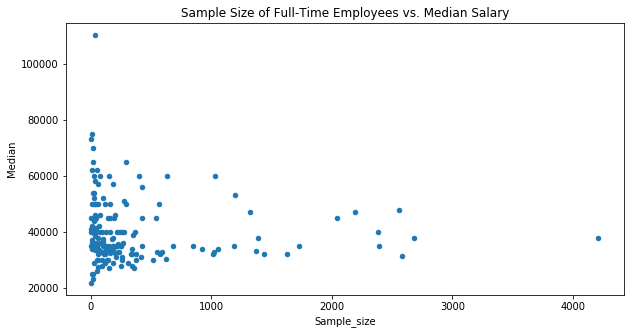

In [6]:
recent_grads.plot(x = 'Sample_size', y = 'Median', kind = 'scatter', 
                  title = 'Sample Size of Full-Time Employees vs. Median Salary',
                  figsize = (10, 5)
                 )

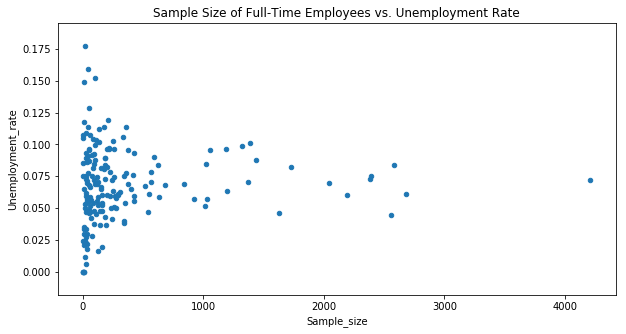

In [7]:
recent_grads.plot(x = 'Sample_size', y = 'Unemployment_rate', kind = 'scatter', 
                  title = 'Sample Size of Full-Time Employees vs. Unemployment Rate',
                  figsize = (10, 5)
                 )

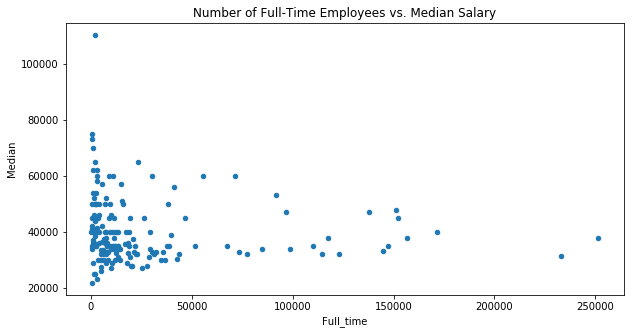

In [8]:
recent_grads.plot(x = 'Full_time', y = 'Median', kind = 'scatter', 
                  title = 'Number of Full-Time Employees vs. Median Salary',
                  figsize = (10, 5)
                 )

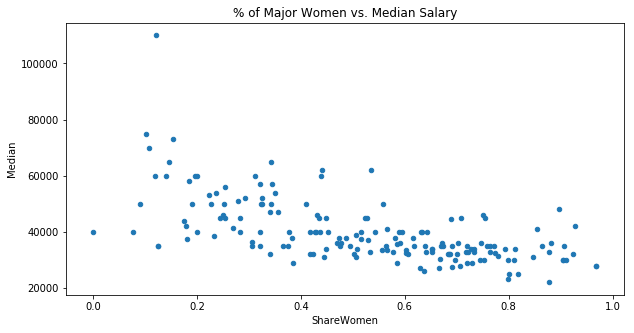

In [9]:
recent_grads.plot(x = 'ShareWomen', y = 'Median', kind = 'scatter', 
                  title = '% of Major Women vs. Median Salary',
                  figsize = (10, 5)
                 )

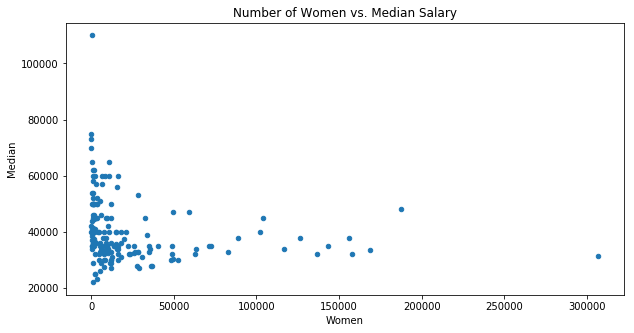

In [10]:
recent_grads.plot(x = 'Women', y = 'Median', kind = 'scatter', 
                  title = 'Number of Women vs. Median Salary',
                  figsize = (10, 5)
                 )

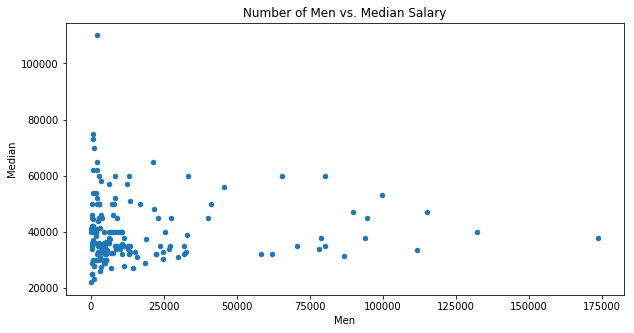

In [11]:
recent_grads.plot(x = 'Men', y = 'Median', kind = 'scatter', 
                  title = 'Number of Men vs. Median Salary',
                  figsize = (10, 5)
                 )

Here are our initial observations based on the scatterplots above:

1. It appears that students in more popular majors command a lower median salary.  However, it's worth keeping in mind that a very small sample size can distort an industry's true average.
2. There is a negative correlation between median salary and majors that are a majority female.  
3. Majors with a large number of full-time employees tend to have a lower median salary.

## Data Exploration: Distribution of Variables

Now that we understand a few of the relationships in our data, let's explore how some questions related to the distributions of these variables.

1. What percentage of majors are predominantly male?  Predominantly female?
2. What is the most common median salary range?
3. What is the range of sample size?
4. How does the the distribution of men sampled compare to women sampled?
5. What can we determine about full-time versus part-time employment?

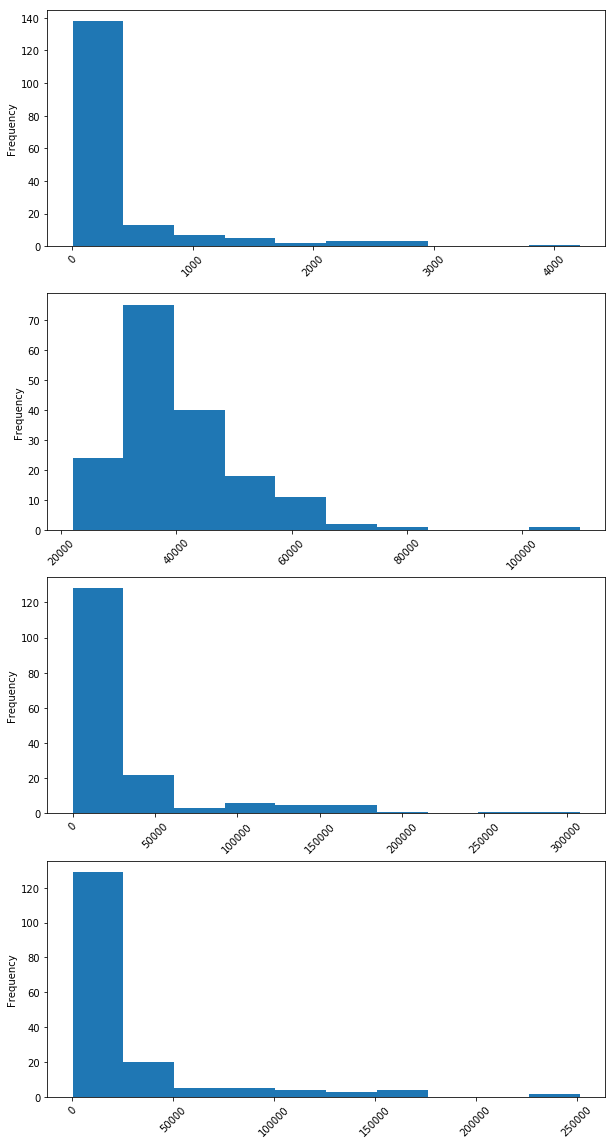

In [12]:
cols = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']
fig = plt.figure(figsize = (10, 20))

for rng in range(0, 4):
    ax = fig.add_subplot(4, 1, rng + 1)
    ax = recent_grads[cols[rng]].plot(kind = 'hist', rot = 45)

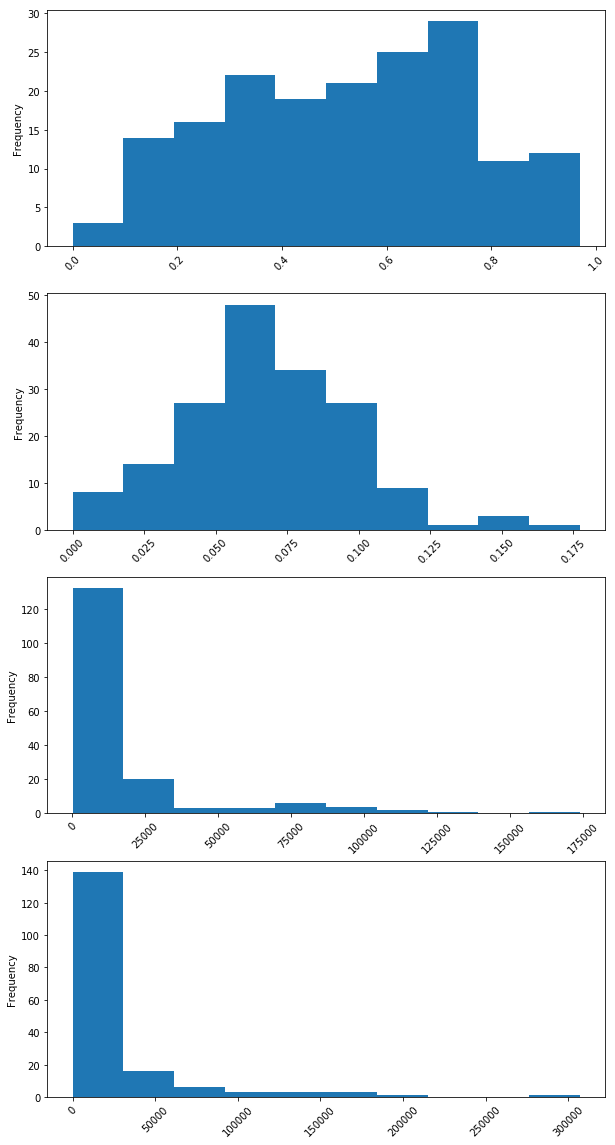

In [13]:
cols = ['Sample_size', 'Median', 'Employed', 'Full_time', 'ShareWomen', 'Unemployment_rate', 'Men', 'Women']
fig = plt.figure(figsize = (10, 20))

for rng in range(4, 8):
    ax = fig.add_subplot(4, 1, rng - 3)
    ax = recent_grads[cols[rng]].plot(kind = 'hist', rot = 45)

Here are some initial observations about our five questions: 

1. Approximately half of the majors are predominantly male and half are predominantly female.
2. The most common median salary range is \\$30,000 - $40,000.
3. The approximate range of sample sizes is 0 - 4,500.
4. It looks like slightly more men were sampled than women.
5. Most majors lead to full-time employment.

## Data Exploration: Combining Potential Relationships and Distributions

Let's use a couple of scatter matrix plots to simultaneously explore potential relationships and distributions.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018020EB3FD0>,
      dtype=object)

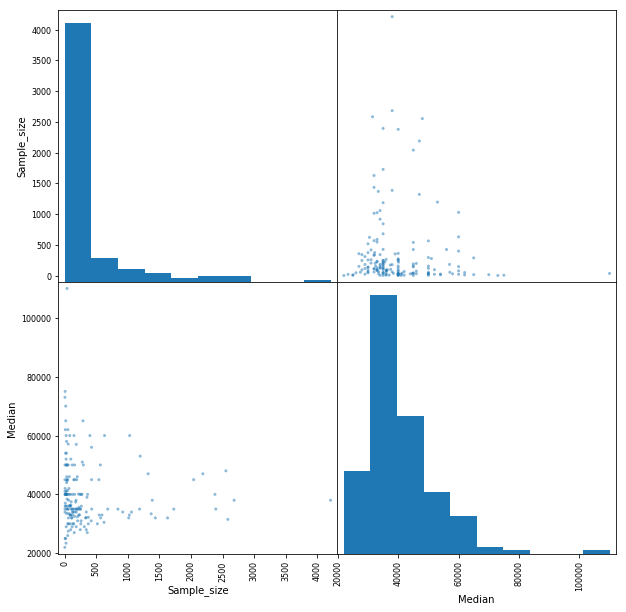

In [18]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize = (10, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018021253710>,
      dtype=object)

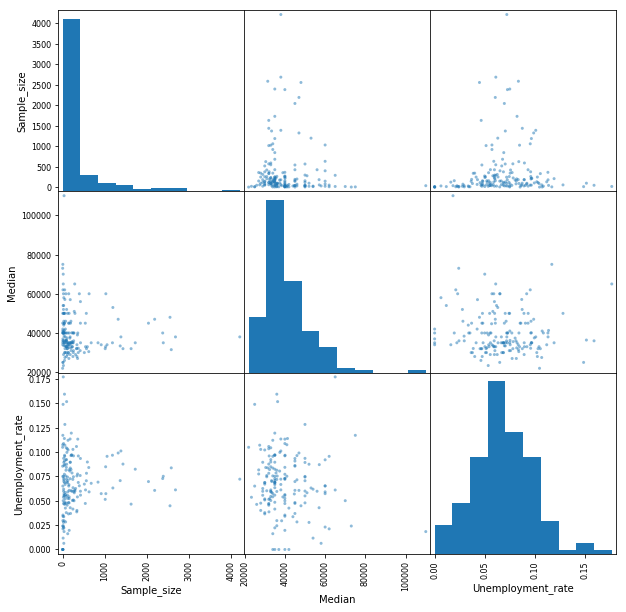

In [15]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize = (10, 10))

While previous observations hold true, we can add that the unemployed population of graduates tended to major in subjects with a lower median salary.

## Data Exploration: Gender Disparity

Earlier, we noticed majors that were predominantly women tended to command lower median salaries.  Let's figure out which majors are comprised of at least 80% women.  

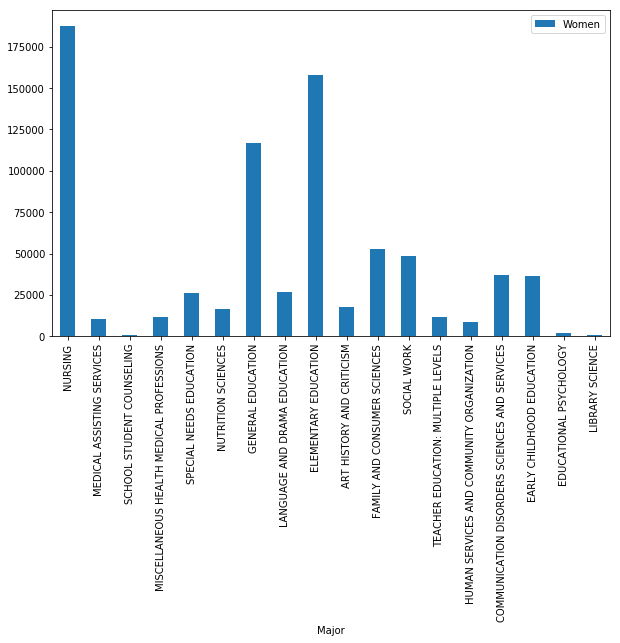

In [16]:
women_recent_grads = recent_grads[recent_grads['ShareWomen'] >= 0.80]
women_recent_grads.plot.bar(x = 'Major', y = 'Women', figsize = (10, 6))

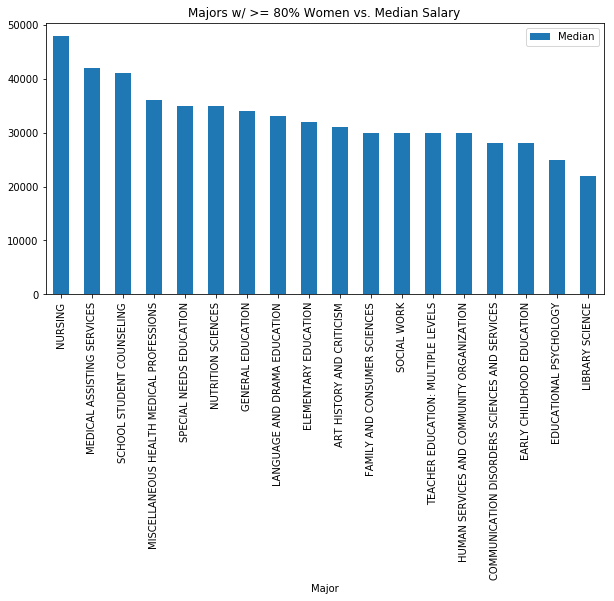

In [17]:
women_recent_grads.plot(x = 'Major', y = 'Median', kind = 'bar', 
                        title = 'Majors w/ >= 80% Women vs. Median Salary', 
                        figsize = (10, 5)
                       )

Of the majors that are at least 80% women, nursing has the highest number of female graduates, followed by elementary education and general education.  Those three majors by far have the highest number of female graduates.

Despite those three majors having the largest number of female graduates, they are not the lowest paying jobs.  In fact, nursing is well above the most common range of median salary ($30-40k).  While drilling deeper into gender disparity in education is beyond the scope of this project, we believe it is an area that deserves further investigation.  